# Netflix Movie Recommender System Using Python

In [42]:
# Import necessary libraries
#first need to install all libraries
!pip install pandas matplotlib seaborn scipy jupyter
!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\dell\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\dell\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


# Data Loading and Preprocessing

In [3]:
# Load the datasets
movies = pd.read_csv(r"movies_metadata.csv", dtype = str)  # Movie details
ratings = pd.read_csv(r"ratings.csv", dtype = str)  # User ratings

In [4]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173


In [5]:
ratings.head()

,userId,id,rating,timestamp
0,1,110,1,1425941529
1,1,147,4.5,1425942435
2,1,858,5,1425941523
3,1,1221,5,1425941546
4,1,1246,5,1425941556


In [6]:
# Merge both datasets
movie_data = pd.merge(ratings, movies, on="id")

# Display first few rows
movie_data.head()

,userId,id,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,imdb_id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,110,1,1425941529,False,"{'id': 131, 'name': 'Three Colors Collection',...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,tt0111495,...,1994-05-27,0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Three Colors: Red,False,7.8,246
1,1,147,4.5,1425942435,False,"{'id': 185682, 'name': 'The Adventures of Anto...",0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0053198,...,1959-05-04,0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Angel faces hell-bent for violence.,The 400 Blows,False,8.0,363
2,1,858,5,1425941523,False,NaN,21000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0108160,...,1993-06-24,227799884,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"What if someone you never met, someone you nev...",Sleepless in Seattle,False,6.5,630
3,1,1246,5,1425941556,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",24000000,"[{'id': 18, 'name': 'Drama'}]",http://www.rocky.com/,tt0479143,...,2006-12-20,155721132,102.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,It ain't over 'til it's over.,Rocky Balboa,False,6.5,858
4,1,1968,4,1425942148,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,tt0119141,...,1997-02-14,29481428,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What if finding the love of your life meant ch...,Fools Rush In,False,5.8,133


In [7]:
# Check for missing values
print(movie_data.isnull().sum())

# Fill or drop missing values (if any)
movie_data.dropna(inplace=True)


userId                        0
id                            0
rating                        0
timestamp                     0
adult                         0
belongs_to_collection    350480
budget                        0
genres                        0
homepage                 348921
imdb_id                       4
original_language             1
original_title                0
overview                   1635
popularity                    0
poster_path                 425
production_companies          0
production_countries          0
release_date                292
revenue                       0
runtime                      42
spoken_languages              0
status                       32
tagline                  140734
title                         0
video                         0
vote_average                  0
vote_count                    0
dtype: int64


# Exploratory Data Analysis (EDA) with Pie Charts

# A. Distribution of Movie Genres

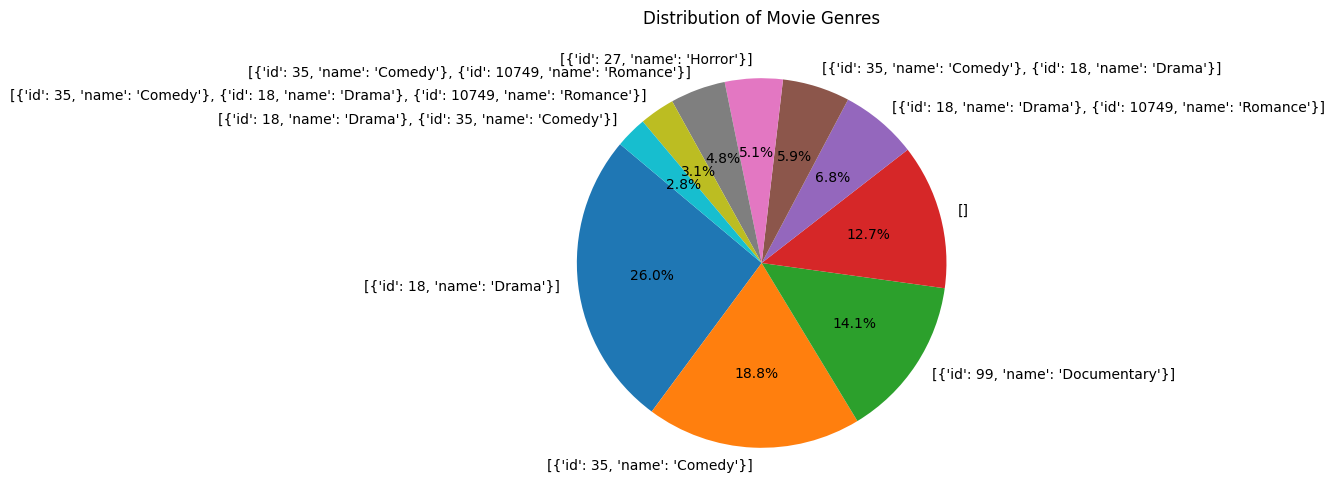

In [8]:
# Count occurrences of each genre
genre_counts = movies['genres'].str.split('|', expand=True).stack().value_counts()

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(genre_counts[:10], labels=genre_counts.index[:10], autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Movie Genres")
plt.show()

# B. Rating Distribution

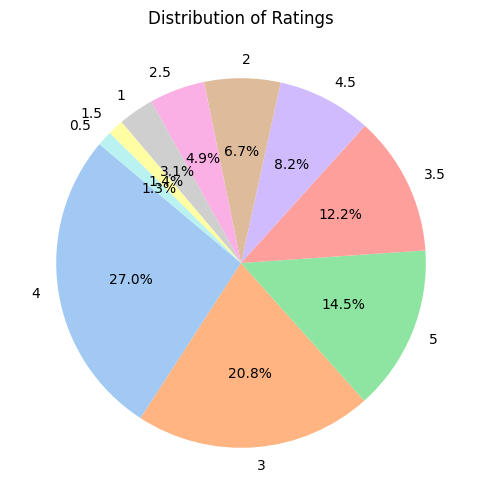

In [9]:
# Count of each rating
rating_counts = ratings['rating'].value_counts()

# Pie chart of rating distribution
plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribution of Ratings")
plt.show()


# Popularity-Based Movie Recommendation

In [10]:
# Find most-watched movies
popular_movies = movie_data.groupby('title').count()['rating'].sort_values(ascending=False)

# Display top 10 movies
print(popular_movies.head(10))


title
Men in Black II                2073
Silent Hill                    2013
Back to the Future Part II     1604
Live and Let Die               1279
Jurassic Park                  1176
Rocky Balboa                   1058
Ocean's Eleven                 1055
The Bourne Supremacy            947
Aliens vs Predator: Requiem     796
Star Wars                       733
Name: rating, dtype: int64


# Visualizing the Most-Watched Movies

C:\Users\dell\AppData\Local\Temp\ipykernel_13660\109916477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_movies.index[:10], y=popular_movies.values[:10], palette="viridis")


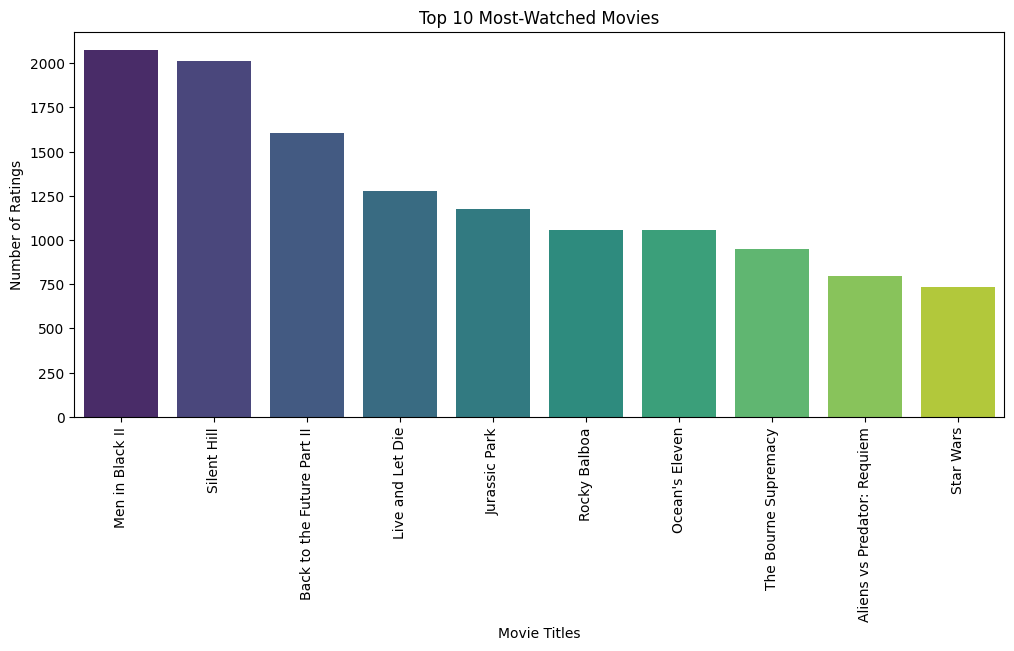

In [11]:
# Bar chart of top 10 movies
plt.figure(figsize=(12, 5))
sns.barplot(x=popular_movies.index[:10], y=popular_movies.values[:10], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Movie Titles")
plt.ylabel("Number of Ratings")
plt.title("Top 10 Most-Watched Movies")
plt.show()


# Content-Based Movie Recommendation

In [41]:
# Get top 5 highest-rated movies
top_5_movies = movie_data[['title', 'rating']].sort_values(by='rating', ascending=False).head(5)
print("Top 5 Highest Rated Movies:\n", top_5_movies)

# Handle missing genres
movie_data['genres'] = movie_data['genres'].fillna('')

# Convert genres to a matrix of TF-IDF features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movie_data['genres'].astype(str))  # Convert to string

# Compute cosine similarity (efficient memory usage)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to recommend similar movies
def recommend_movie(title):
    try:
        index = movie_data[movie_data['title'] == title].index[0]
        similarity_scores = list(enumerate(cosine_sim[index]))  # Get similarity scores
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)  # Sort
        movie_indices = [i[0] for i in similarity_scores[1:6]]  # Get top 5 recommendations
        return movies.iloc[movie_indices][['title', 'genres', 'rating']]
    except IndexError:
        return "Movie not found."

# Example: Get recommendations for a specific movie
print("\nRecommended Movies for 'The Boys':\n", recommend_movie("The Boys"))


Top 5 Highest Rated Movies:
                                              title rating
3                                     Rocky Balboa      5
344123                  Back to the Future Part II      5
227257                                 Silent Hill      5
227254                                       Alien      5
143120  Pirates of the Caribbean: Dead Man's Chest      5

Recommended Movies for 'The Boys':
 Movie not found.
